## Exercise: Build a linear regression model to predict fish weight

Using the fish dataset in this repo (location relative to this notebook: `../datasets/fish/Fish.csv`) do the following:

1. Split the data into labels and features, with the "weight" column being the label and the other columns as features.
2. Drop all the "species" information from the input features (we'll assume all fish are similarly dense...).
3. Split the fish data into training and validation sets.
4. Fit the model!
5. Score the model, what is this value? How should you interpret it?
    * Hint, the default is this: [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
6. Examine the coefficents and intercept value...
    * Which coefficent is tied to which input feature?
    * Are there any that seem especially large?
    * According to your model, what is the formula that maps fish features to fish weight?
7. Compute and plot the residuals (error) of the validation scores.
    * Hint, computing residuals: [https://stackoverflow.com/questions/55095437/in-python-sklearn-regression-is-there-a-command-to-return-residuals-for-all-rec](https://stackoverflow.com/questions/55095437/in-python-sklearn-regression-is-there-a-command-to-return-residuals-for-all-rec)
    * Hint, creating a scatterplot: [https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)
    * Do you see any signs of heteroscedasticity or autocorrelation?
    

In [7]:
# All your code belo
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
path_to_fish = '../datasets/fish/Fish.csv'
fish_df = pd.read_csv(path_to_fish)
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

labels = fish_df['Weight']
features = fish_df.drop(labels=['Weight','Species'], axis=1)

# We "hold out" some data to test if our model can work
# on data it wasn't allowed to see during the training process
training_data, test_data, training_labels, test_labels = train_test_split(features, labels, test_size=0.2)

model = LinearRegression()
model.fit(training_data, training_labels)

# We generally "score" the model based on the held out data, but it's useful to compare 
# the training scores to the test scores to look for "overfitting"ArithmeticError
train_score = model.score(training_data, training_labels)
test_score = model.score(test_data, test_labels)

print(f"train: {train_score}, test: {test_score}")

for name, coef in zip(features.columns, model.coef_):
    print(name, coef)

train: 0.8873034691400369, test: 0.8310873221808646
Length1 41.209807456690626
Length2 13.856074157918176
Length3 -27.804072271670353
Height 28.03916413459851
Width 20.79667035162807


In [54]:
prediction = model.predict(test_data)
residuals = (test_labels - prediction)

<AxesSubplot:xlabel='index', ylabel='Weight'>

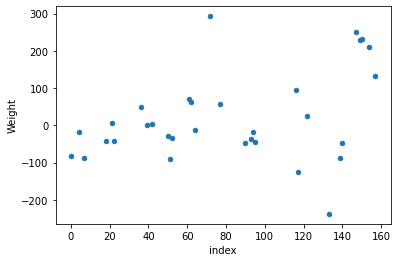

In [57]:
residuals.reset_index().plot.scatter(x = 'index', y = 'Weight')


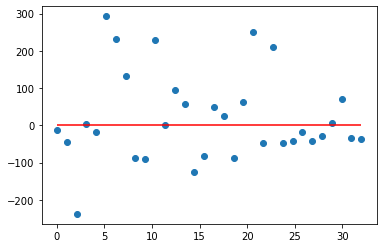

In [58]:
plt.scatter(np.linspace(0, len(residuals), len(residuals)), residuals)
plt.hlines(0, 0, len(residuals), color='r')